In [1]:
# Loading the necesarry libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# reading the training file as ames
ames = pd.read_csv("datasets/train.csv")

In [3]:
# checking the data - first 5 rows
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
# using .shape() function to see the size
ames.shape

(2051, 81)

In [5]:
# Checking the null values
ames.isnull().sum().sort_values(ascending=False)

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Fireplace Qu    1000
                ... 
Electrical         0
Central Air        0
Heating QC         0
Sale Type          0
Id                 0
Length: 81, dtype: int64

In [6]:
# As we see there are minimum 2042 row with Nan values out of 2051 rows. 
# If we drop the Nan values from the DataFrame, the DataFrame loses its meaning.
# Because of that, we are going to drop Nan values from the columns that have importance for our model.

In [7]:
#checking the columns that has null values. Sorting the result by the number of null values
ames.isnull().sum().sort_values(ascending=False)[ames.isnull().sum().sort_values(ascending=False) > 0]

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
BsmtFin SF 1         1
dtype: int64

In [8]:
# Checking the column names
ames.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [9]:
# checking the numerical data. 
# Using .get_numerical_data function to get the numerical columns and creating a variable called ames_num
ames_num = ames._get_numeric_data()
ames_num.columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [10]:
# creating a variable with correlation
corr = ames.corr()

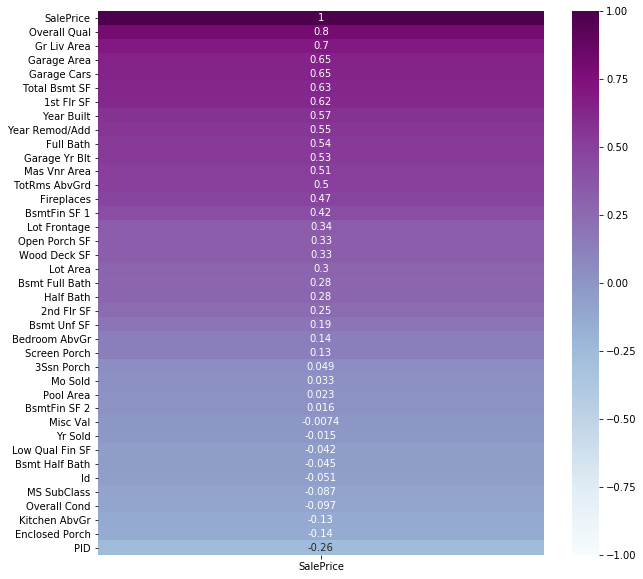

In [11]:
# creating a heatmap with the corr variable, 

plt.figure(figsize=[10,10])
# using only SalePrice column, and sorting with by the SalePrice
sns.heatmap(corr[["SalePrice"]].sort_values(by="SalePrice", ascending=False),
    vmin=-1,
            vmax=1,
            annot=True,
            cmap="BuPu"

);

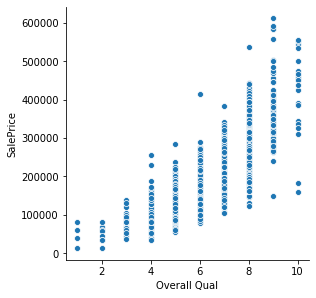

In [12]:
#  Looking at the distribution of Overall Quality vs SalePrice on the plot.

sns.pairplot(ames, x_vars=["Overall Qual"], y_vars=["SalePrice"], height=4);

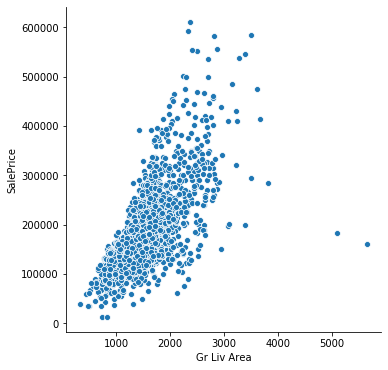

In [13]:
# Using pairplot to view Living Area vs SalePrice
sns.pairplot(ames, x_vars=["Gr Liv Area"], y_vars=["SalePrice"], height=5);

We see that there are 2 outlier in the plot. We will need to exclude them in the model.

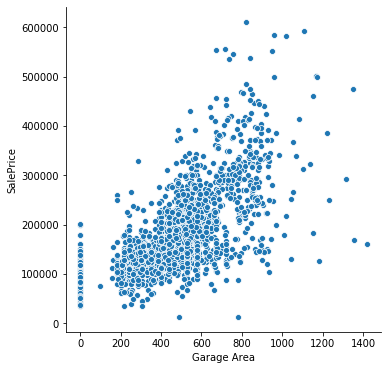

In [14]:
# Using pairplot to view Garage Area vs SalePrice

sns.pairplot(ames, x_vars=["Garage Area"], y_vars=["SalePrice"], height=5);

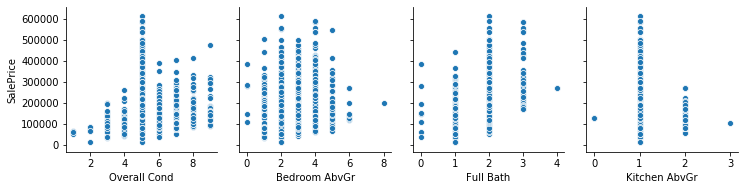

In [15]:
# Looking at the distribution of Overall cond, Bedroom, Full Bath and number of kitchen 
sns.pairplot(ames, x_vars=["Overall Cond","Bedroom AbvGr", "Full Bath", "Kitchen AbvGr"], y_vars=["SalePrice"]);

We can see few outliers in bedroom, full bathroom and kithcen.

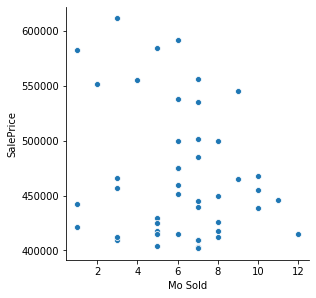

In [16]:
# Looking at the sales month of the expensive houses 
sns.pairplot(ames[ames["SalePrice"] > 400000], x_vars=["Mo Sold"], y_vars=["SalePrice"], height=4 );


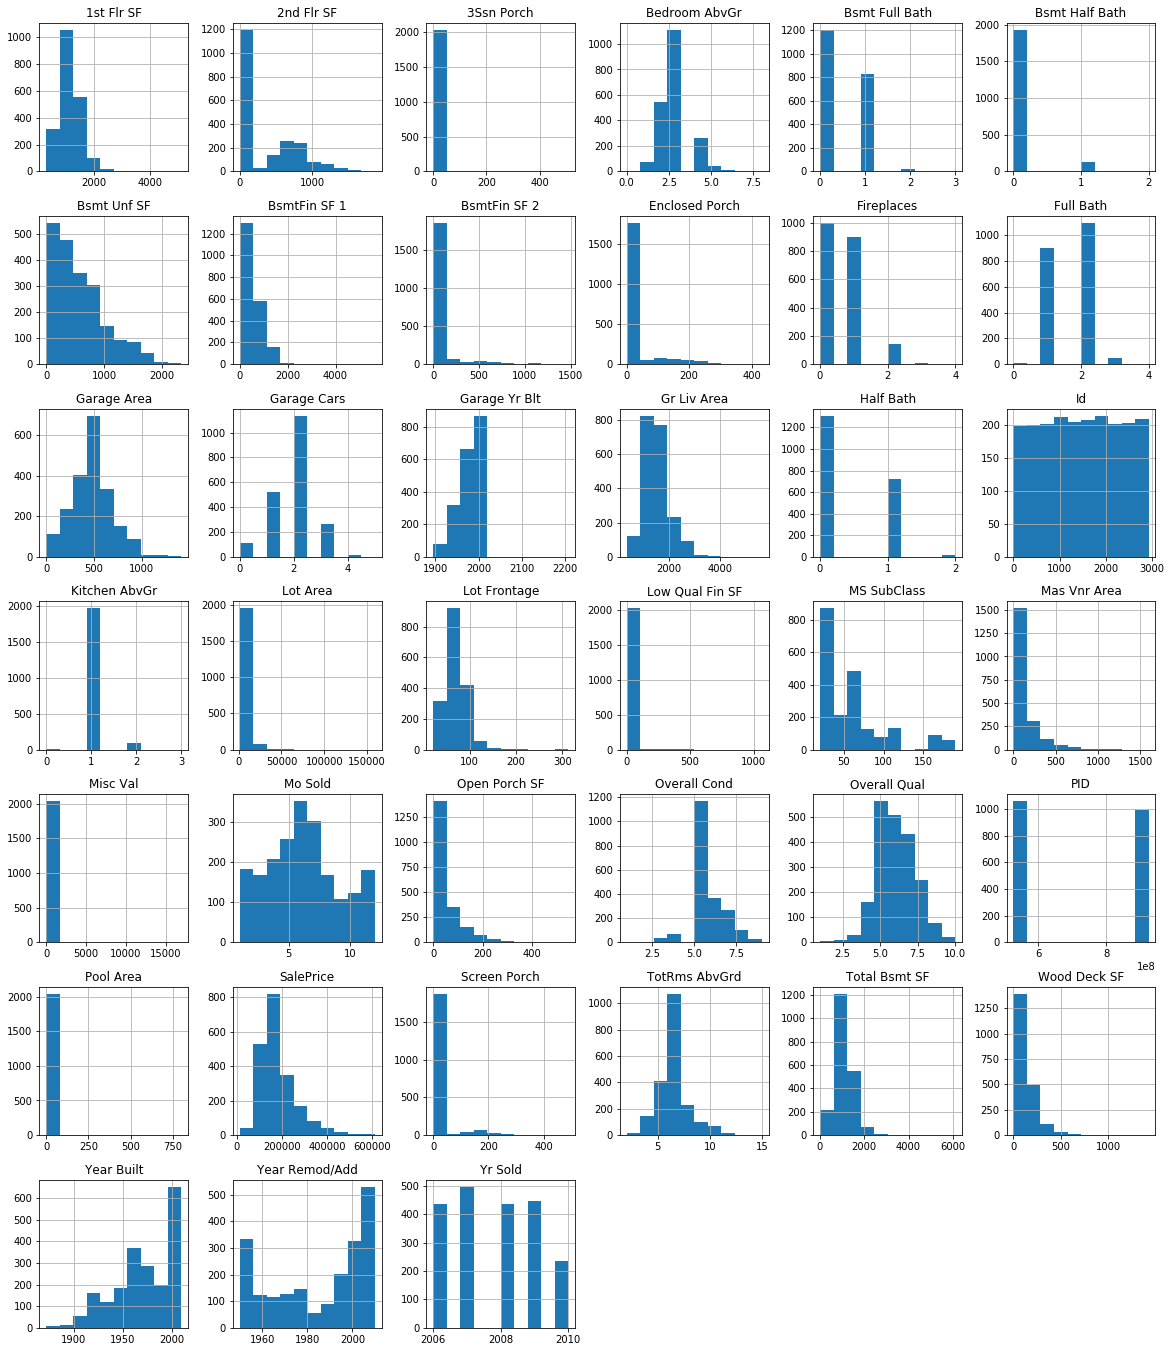

In [17]:
# General Histograms of parameters
ames.hist(figsize=(20, 24));

Most of the variables are discrete variables. There are also some non-numerical variable that we need to convert to dum variables. When we convert them they are going to be discrete variables also.

In [18]:
# Looking at the descriptive statistics of SalePrice
ames[["SalePrice"]].describe()

,SalePrice
count,2051.000000
mean,181469.701609
std,79258.659352
min,12789.000000
25%,129825.000000
50%,162500.000000
75%,214000.000000
max,611657.000000


In [19]:
# Identifying the sales years. I will use this information to scale salesprice in one of my models.
ames["Yr Sold"].unique()

array([2010, 2009, 2006, 2007, 2008])

In [20]:
# exporting the clean data
ames.to_csv("datasets/ames_housing.csv", index=False)

Based on the column names and their description in the Data Dictionary, and the above heatmap and histograms; we are going to use below non-numerical and numerical columns as predictors.

Non-Numerical predictors:

MS Zoning  
Neighborhood  
Kitchen Qual  



Numerical predictors:

MS SubClass
Lot Area
Garage Area
Overall Qual  
Overall Cond  
Fireplaces
Gr Liv Area    
Full Bath  
Bedroom  (Bedroom AbvGr)  
Kitchen  (Kitchen AbvGr)  
Garage Cars  
Mo Sold  
Year Built  
Year Remod/Add  


In [21]:
# reading the test file as ames_test
ames_test= pd.read_csv("datasets/test.csv")

In [22]:
# viewing the first rows
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [23]:
# using .shape() function to see the size
ames_test.shape

(878, 80)

In [24]:
# Viewing the column names
ames_test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [25]:
# Viewing the null values
ames_test.isnull().sum().sort_values(ascending=False)

Pool QC         874
Misc Feature    837
Alley           820
Fence           706
Fireplace Qu    422
               ... 
Heating QC        0
Heating           0
Yr Sold           0
Bsmt Unf SF       0
Id                0
Length: 80, dtype: int64